<a href="https://colab.research.google.com/github/khadkaashim/Dengue_Detection_PPG/blob/main/Predicting_Channel_Gain_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Parameters
num_samples = 5000
snr_db = 10  # Signal-to-Noise Ratio in dB

In [ ]:
# Generate random transmitted signals
transmitted_signal = np.random.randint(0, 2, num_samples) * 2 - 1  # BPSK: 0 -> -1, 1 -> 1

In [ ]:
transmitted_signal


array([ 1,  1, -1, ...,  1,  1, -1])

In [ ]:
# Generate fading factor (random)
fading = np.random.uniform(0.5, 1.5, num_samples)

In [ ]:
# Convert SNR to linear scale and calculate noise
snr_linear = 10 ** (snr_db / 10)
noise_std = 1 / np.sqrt(snr_linear)
noise = np.random.normal(0, noise_std, num_samples)

In [ ]:
# Generate received signal
received_signal = fading * transmitted_signal + noise

# Create a dataset
data = pd.DataFrame({
    'TransmittedSignal': transmitted_signal,
    'ReceivedSignal': received_signal,
    'FadingFactor': fading
})

# Display the first few rows
print(data.head())


   TransmittedSignal  ReceivedSignal  FadingFactor
0                  1        0.767997      0.606945
1                  1        0.983369      1.495596
2                 -1       -0.156280      0.631517
3                  1        0.887291      0.804318
4                 -1       -1.750391      0.971154


In [ ]:
from sklearn.model_selection import train_test_split

# Features: TransmittedSignal and ReceivedSignal
X = data[['TransmittedSignal', 'ReceivedSignal']].values

# Labels: FadingFactor
y = data['FadingFactor'].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 4000, Testing samples: 1000


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")


Mean Squared Error (MSE): 0.0660


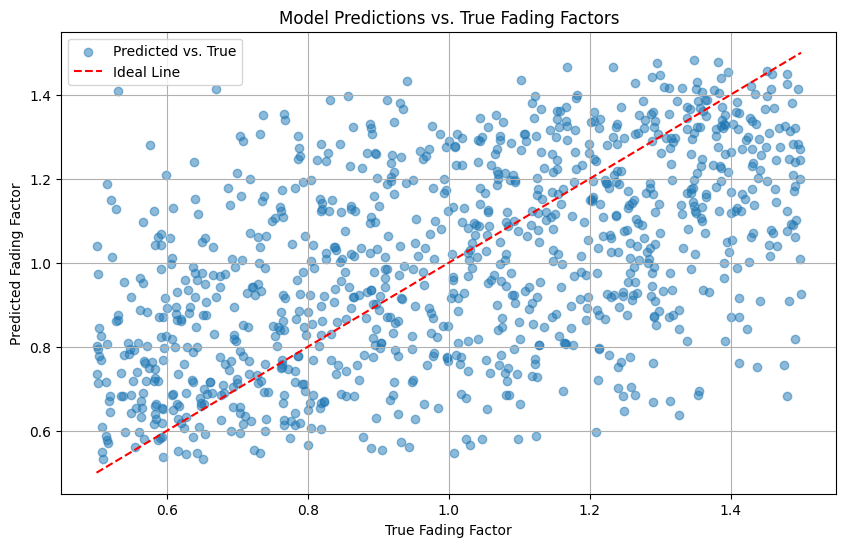

In [ ]:
import matplotlib.pyplot as plt

# Plot true vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs. True')
plt.plot([0.5, 1.5], [0.5, 1.5], color='red', linestyle='--', label='Ideal Line')
plt.xlabel("True Fading Factor")
plt.ylabel("Predicted Fading Factor")
plt.title("Model Predictions vs. True Fading Factors")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the neural network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = nn_model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)

# Evaluate the model
nn_loss, nn_mae = nn_model.evaluate(X_test, y_test, verbose=0)
print(f"Neural Network Loss: {nn_loss:.4f}, MAE: {nn_mae:.4f}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3095 - mae: 0.4454 - val_loss: 0.0431 - val_mae: 0.1716
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0465 - mae: 0.1790 - val_loss: 0.0422 - val_mae: 0.1678
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0461 - mae: 0.1750 - val_loss: 0.0420 - val_mae: 0.1659
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0452 - mae: 0.1720 - val_loss: 0.0420 - val_mae: 0.1660
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0461 - mae: 0.1745 - val_loss: 0.0429 - val_mae: 0.1677
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0451 - mae: 0.1712 - val_loss: 0.0417 - val_mae: 0.1654
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0423 - mae: 0.1663 - val_loss: 0.0422 - val_mae: 0.1659
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0454 - mae: 0.1737 - val_loss: 0.0425 - val_mae: 0.1666
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0448 

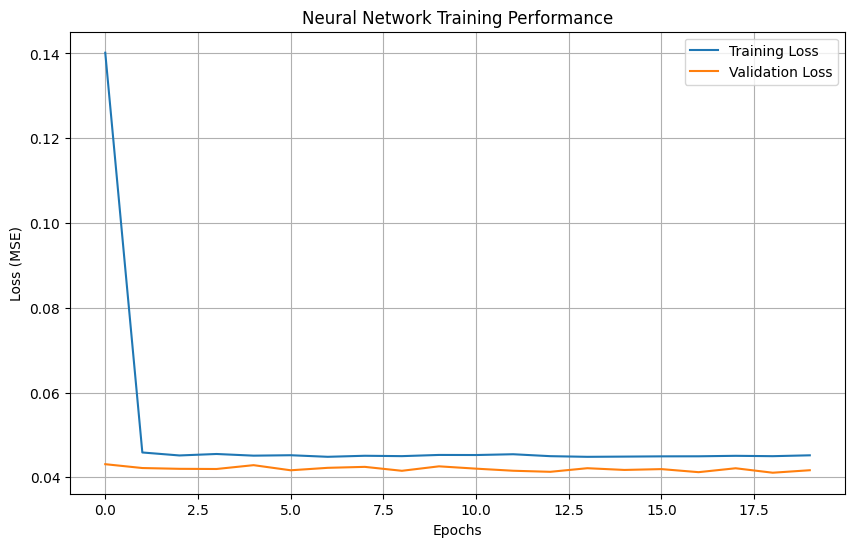

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Neural Network Training Performance")
plt.legend()
plt.grid()
plt.show()
